In [2]:
!pip install tensorly

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
import numpy as np
import tensorly
#scarichiamo il nostro database
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
import tensorly.decomposition
import matplotlib.pyplot as plt
import tensorly.decomposition
import random as random
from numpy import linalg as la

#n_prove=300|porzione=250|label_test=1|basi=10
def distance_method(Dtest,Dtrain,basi,n_prove,porzione,label_test):
    residuo_matrix=np.zeros((n_prove,basi)) 
    differenza_basi=np.zeros((28,28,basi))#inizializzo immagini basi
    for t_range in range(n_prove):
        for label in range(basi):
            #Immagini di training della label
            Dataset_num= DTrain[(mnist.train.labels[:,label])==1,:,:]
            #prendo solo n elementi del dataset imagini relativo al numero
            Dataset_num=Dataset_num[:porzione,:,:]
            Dataset_num=np.transpose(Dataset_num)
            #immagine vettorizzata del nostro database
            kern=Dataset_num.reshape(784,porzione)

            #applichiamo la svd e ricaviamo U1 s1 V1 
            U1, s1, V1 = np.linalg.svd(tensorly.unfold(kern,0),full_matrices=False)
            
            DTest_num=DTest[(mnist.test.labels[:,label_test])==1,:,:]
            if(n_prove!=1):
                test_image = np.transpose(DTest_num[t_range,:,:])
            else:
                test_image = np.transpose(DTest_num[random.randint(0,DTest[0].size),:,:])
            #calcoliamo il residuo dato dalla formula vista sul libro per risolvere il problema di minimo
            #residuo= np.zeros((1,U1.shape[1]))
            i=1 #numero di basi utilizzate
            #for i in range(U1.shape[1]):
            U_k=U1[:,:i] #effettuiamo una specie di compressione scegliendo non tutte le basi di U1
            U_kt=np.transpose(U_k)
            residuo=np.linalg.norm(test_image.reshape(784)-np.dot(U_k,np.dot(U_kt,test_image.reshape(784))),2)/np.linalg.norm(test_image.reshape(784),2)
            residuo_matrix[t_range][label]=residuo
            differenza_basi[:,:,label]= np.dot(U_k,np.dot(U_kt,test_image.reshape(784))).reshape(28,28)
    return residuo_matrix, differenza_basi

In [6]:
def grafico(residuo_matrix,size,title):
    import matplotlib.pyplot as plt
    transp=np.transpose(residuo_matrix)
    fig = plt.figure(figsize=(size,size))
    plt.title(title)
    plt.xticks(np.linspace(0,9,10,endpoint=True))
    plt.yticks(np.linspace(0,1,30,endpoint=True))
    plt.grid()
    plt.plot(transp,color="black",marker='.')
    #plt.savefig("test_residuo_distance_method(5).png")

In [7]:
#Scarichiamo i database
DTest = np.asarray(mnist.test.images).reshape(10000,28,28)
DTrain=np.asarray(mnist.train.images).reshape(55000,28,28)

In [8]:
#definiamo le variabili
n_test=300 #numero di test che vogliamo effettuare
#porzione=500 #porzione del database di training da cui vogliamo prendere informazioni
#label_test=3 #il numero dell'immagine di test che vogliamo testare
basi=10 #le prime basi con cui fare il training


In [9]:
def statistica(residui,n_test,label_test):
    statistica_iniziale=0
    for i in range(n_test):
        a=list(residui[0][i])
        minimo =min(a)
        if(a[label_test]==minimo):
            statistica_iniziale=statistica_iniziale+1 
    return 100*statistica_iniziale/n_test

In [ ]:
#funzione che calcola le percentuali di precisione per ogni label_test
#inoltre calcola la variazione di questa percentuale se cambiamo la porzione
#del database di training
general=np.zeros((1,10),float)
i=0
for porzione in range (50,60,10):
    for label_test in range(10):
        residui,immagini=distance_method(DTest,DTrain,basi,n_test,porzione,label_test)
        centro=statistica(residui,n_test,label_test)
        print(str(porzione)+" : "+ str(centro))
        general[i][label_test]=centro
    i=i+1

In [176]:
a=[98.67,97.33,87.67,88.00,87.67,72.00,94.33,87.67,86.33,89.67]
numpy.mean(a)



88.934

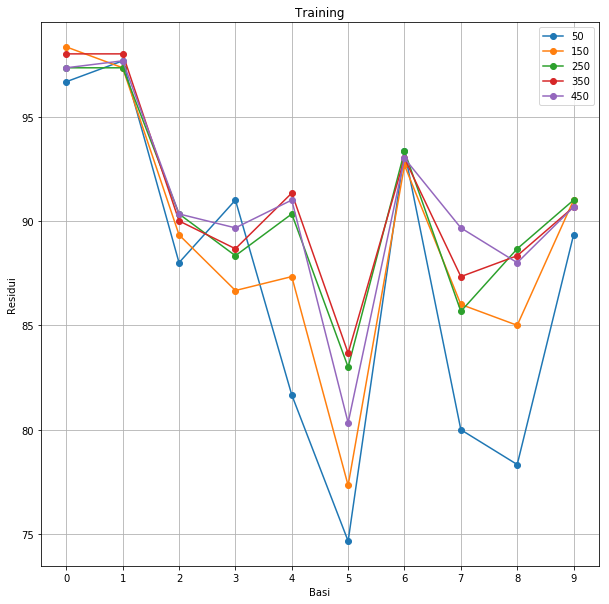

In [17]:
#residui per basi a diversa densità di training
import numpy as np
import matplotlib.pyplot as plt
transp=np.transpose(general)
fig = plt.figure(figsize=(10,10))
plt.xticks(range(10))
plt.yticks(range(70,100,5))
plt.xlabel("Basi")
plt.ylabel("Residui")
plt.plot(transp,marker='o')
plt.grid()
plt.title("Training")
x=range(50,550,100)
plt.legend(x)
plt.savefig("test_residuo(5)hosvd.png")

Populating the interactive namespace from numpy and matplotlib


C:\Users\kekko\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


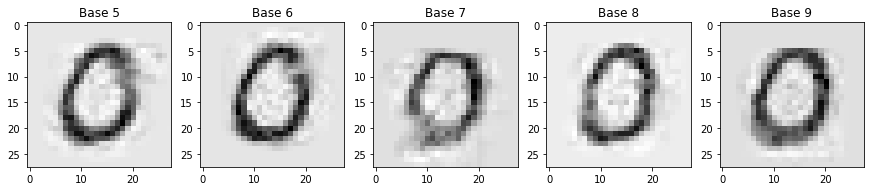

In [119]:
#funzione che calcola le prime 5 subplot di test
%pylab inline
fig = plt.figure(figsize=(15,15))
j=1
for i in range(5,10):
    plt.subplot(1,5,j)
    plt.title("Base "+str(i))
    plt.imshow(np.transpose(immagini[:,:,i]), cmap='Greys', interpolation='None')
    j=j+1

ValueError: setting an array element with a sequence.

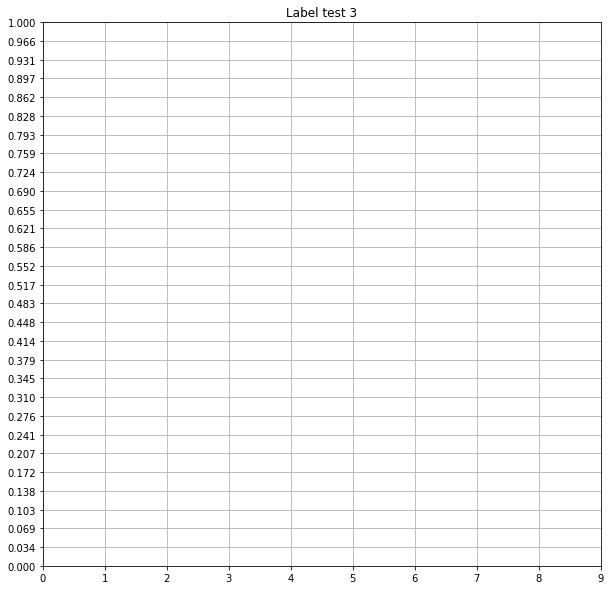

In [51]:
grafico(residui,10,"Label test 3")

Populating the interactive namespace from numpy and matplotlib


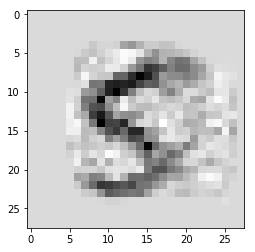

In [83]:
img=np.dot(U_k,np.dot(U_kt,test_image.reshape(784)))
img=img.reshape(28,28)
%pylab inline
imshow(img, cmap='Greys', interpolation='None')